In [17]:
import pandas as pd

from sysinit.futures.adjustedprices_from_db_multiple_to_db import process_adjusted_prices_single_instrument
from sysinit.futures.multipleprices_from_db_prices_and_csv_calendars_to_db import process_multiple_prices_single_instrument
from sysinit.futures.norgate_futures_contract_prices import (
    rename_files,
    check_prices_match, 
    transfer_norgate_prices_to_db_single, 
    transfer_norgate_prices_to_db_single_contract
)
from sysinit.futures.rollcalendars_from_arcticprices_to_csv import build_and_write_roll_calendar
from sysobjects.dict_of_futures_per_contract_prices import dictFuturesContractPrices
from sysobjects.futures_per_contract_prices import futuresContractPrices
from sysproduction.data.prices import diagPrices
from sysproduction.update_sampled_contracts import update_sampled_contracts
from sysdata.csv.csv_roll_parameters import csvRollParametersData
from sysobjects.roll_calendars import rollCalendar
from syscore.pandas.pdutils import print_full

diag_prices = diagPrices()
#norgate_path = get_production_config().get_element_or_arg_not_supplied("norgate_path")
#norgate_path = "/Users/ageach/Documents/backup/pst_jani/norgate/"
norgate_path = "/home/alpha/data/norgate/"

# barchart import
from sysdata.csv.csv_futures_contract_prices import csvFuturesContractPriceData
from sysinit.futures.barchart_futures_contract_prices import (
    BARCHART_CONFIG,
    transfer_barchart_prices_to_db_single,
    transfer_barchart_prices_to_db_single_contract,
)
barchart_path = "/home/alpha/data/barchart"


# todo
# check csv's, spike etc.: COPPER,DJSTX-SMALL,OATIES,AEX,MSCIEAFA,CHFJPY,CNH,ETHANOL,EUA,BOVESPA,CHINAA-CON,EPRA-EUROPE,JP-REALESTATE,OMX,BB3M
# MSCISING update sampled contracts crashes on missing 20220900 contract
# LEANHOG compare expected roll calendar with rob's
# JPY divide/multiply by 100 to match to IB prices
# RICE norgate has couple years more data, Norgate data needs to be divided by 100
# ETHEREUM, MSCITAIWAN, SONIA3 rename doesn't find files, which are there???
# CRUDE_W roll cal broken
# CAC check prices


# instruments added
# 2024-10-08: SP500_micro, CORN, BUND, EUROSTX, NASDAQ_micro, WHEAT, LIVECOW, GBP, SMI, US10, US20, US5, BTP, BITCOIN, SOYOIL, REDWHEAT, FEEDCOW
# 2024-10-09: DX, CHF, DOW, RUSSELL, SUGAR_WHITE, SUGAR11, GILT, BUXL, GOLD, GOLD_micro, NASDAQ, NASDAQ_micro
# 2024-10-10: KOSPI, KOSPI_mini, EUR, EUR_micro
# 2024-10-11: COCOA, COFFEE, OJ, CAD
# 2024-10-12: FTSE100, SP400
# 2024-10-14: GICS, ROBUSTA, GASOIL
# 2024-10-15: US10U, US30

INSTR = 'US30'
NORGATE_TICKER = 'UB'
print(INSTR)

US30


In [ ]:
## View individual Barchart CSV price files in one plot

<Axes: title={'center': 'Individual Barchart CSV contract prices for MSCISING'}, xlabel='index'>

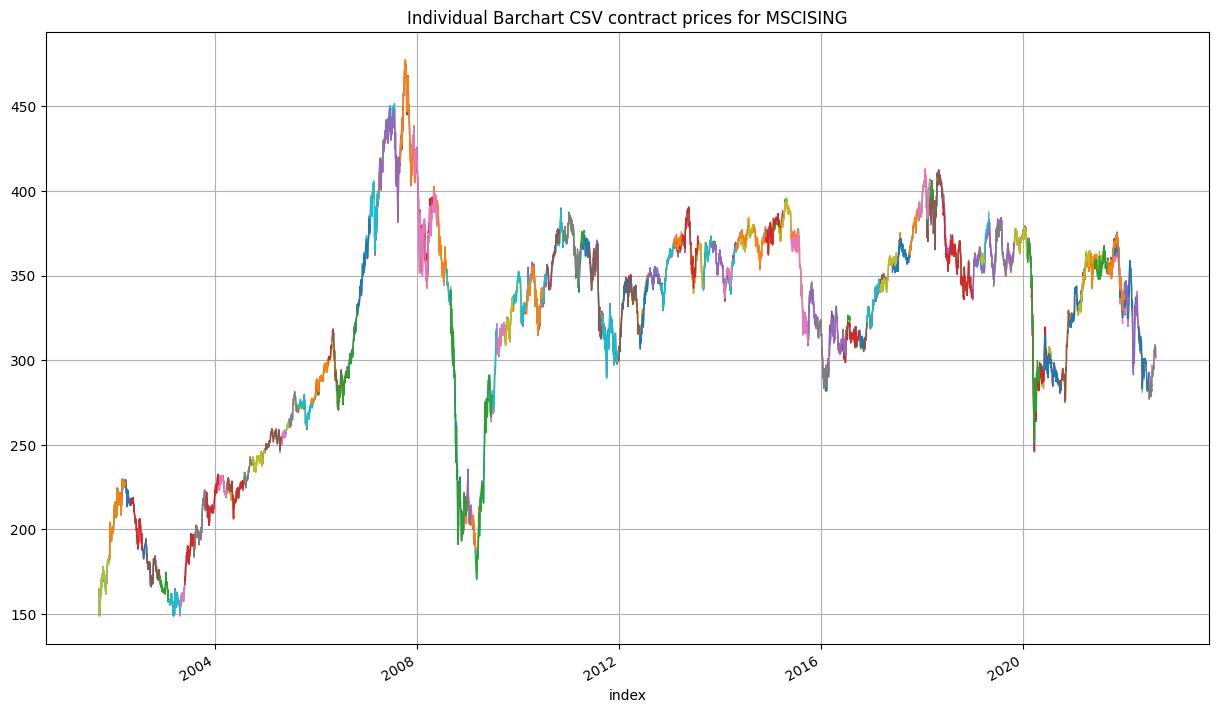

In [10]:
prices = csvFuturesContractPriceData(config=BARCHART_CONFIG, datapath=barchart_path)
price_dict = prices.get_merged_prices_for_instrument(INSTR)
contract_data = dict([(contractid, data) for contractid, data in price_dict.items()])
all_contract_data = dictFuturesContractPrices([(key, futuresContractPrices(x)) for key, x in contract_data.items()])
contract_prices_final = all_contract_data.final_prices()
all_finals = pd.concat(contract_prices_final, axis=1)
# all_finals = all_finals["2022-03-01":"2023-02-01"] # slice by date
#all_finals = all_finals[["20230900","20240300"]] # slice by contract
all_finals.plot(figsize=(15,9), legend=False, lw=1, grid=True, title=f"Individual Barchart CSV contract prices for {INSTR}")

In [ ]:
## import an instrument from Barchart CSV files

In [11]:
transfer_barchart_prices_to_db_single("MSCISING", datapath=barchart_path)

MSCISING
Getting Frequency.Mixed .csv prices may take some time
Have Frequency.Mixed .csv prices for the following contracts:
dict_keys(['20171200', '20050300', '20191100', '20120300', '20110700', '20021200', '20170500', '20190500', '20230300', '20031100', '20030500', '20070500', '20041000', '20140400', '20220200', '20180400', '20080800', '20180900', '20151000', '20210900', '20070900', '20191200', '20100100', '20080300', '20170100', '20210500', '20130200', '20140200', '20110100', '20160800', '20211100', '20150100', '20180300', '20140600', '20190600', '20030700', '20141100', '20101100', '20080900', '20101200', '20061000', '20150800', '20200200', '20100800', '20050700', '20131000', '20150600', '20050100', '20100200', '20140800', '20110600', '20180100', '20110200', '20020900', '20190900', '20210300', '20030600', '20091000', '20210700', '20020100', '20111000', '20170700', '20160700', '20071000', '20111100', '20211000', '20200800', '20130600', '20201200', '20081000', '20170800', '20091200',

In [ ]:
## Import single contract from Barchart CSV files

In [19]:
transfer_barchart_prices_to_db_single_contract("MSCISING", "20220900", datapath=barchart_path)

Importing MIXED csv prices for MSCISING/20220900
Getting MIXED .csv prices may take some time
Contract object is MSCISING/20220900
Frequency.Mixed .csv prices are 
                       OPEN    HIGH     LOW   FINAL  VOLUME
index                                                      
2021-10-14 05:00:00  357.40  357.40  357.40  357.40       0
2021-10-15 05:00:00  357.50  357.50  357.50  357.50       0
2021-10-18 05:00:00  357.95  357.95  357.95  357.95       0
2021-10-19 05:00:00  360.90  360.90  360.90  360.90       0
2021-10-20 05:00:00  362.25  362.25  362.25  362.25       0
...                     ...     ...     ...     ...     ...
2022-08-10 05:00:00  301.20  305.45  301.20  305.45      30
2022-08-11 05:00:00  305.80  309.20  305.80  309.20      31
2022-08-12 05:00:00  310.50  310.50  308.15  309.00      87
2022-08-15 05:00:00  308.15  309.65  307.75  308.30     253
2022-08-17 05:00:00  307.55  307.70  301.30  302.00     567

[101 rows x 5 columns]
Writing to db
2024-10-11 15:30:5

## renaming files for a single instrument from Norgate to PST format
- this moves the files from `norgate_path/Futures` to `norgate_path/Futures_conv` 

In [18]:
path_str = f"{norgate_path}/Futures"
rename_files(path_str, NORGATE_TICKER, dry_run=False)

Renaming /home/alpha/data/norgate/Futures/UB-2023M.csv to /home/alpha/data/norgate/Futures_conv/Day_US30_20230600.csv
Renaming /home/alpha/data/norgate/Futures/UB-2024U.csv to /home/alpha/data/norgate/Futures_conv/Day_US30_20240900.csv
Renaming /home/alpha/data/norgate/Futures/UB-2018U.csv to /home/alpha/data/norgate/Futures_conv/Day_US30_20180900.csv
Renaming /home/alpha/data/norgate/Futures/UB-2015U.csv to /home/alpha/data/norgate/Futures_conv/Day_US30_20150900.csv
Renaming /home/alpha/data/norgate/Futures/UB-2014H.csv to /home/alpha/data/norgate/Futures_conv/Day_US30_20140300.csv
Renaming /home/alpha/data/norgate/Futures/UB-2024M.csv to /home/alpha/data/norgate/Futures_conv/Day_US30_20240600.csv
Renaming /home/alpha/data/norgate/Futures/UB-2024H.csv to /home/alpha/data/norgate/Futures_conv/Day_US30_20240300.csv
Renaming /home/alpha/data/norgate/Futures/UB-2019H.csv to /home/alpha/data/norgate/Futures_conv/Day_US30_20190300.csv
Renaming /home/alpha/data/norgate/Futures/UB-2015Z.csv t

## Check that IB and Norgate/Barchart prices match
- sometimes one is in dollars, the other cents etc
- If there is a mismatch, make a record of the instrument code and skip it for now. We will come back to it

In [19]:
path_str = f"{norgate_path}/Futures_conv"
check_prices_match(path_str, INSTR, "20240900")

Checking that Norgate and IB prices match for US30
Current parquet prices for US30, contract 20240900: 
                          OPEN       HIGH        LOW      FINAL  VOLUME
index                                                                  
2024-09-18 22:00:00  135.06250  135.06250  134.78125  134.78125   159.0
2024-09-18 23:00:00  135.00000  135.00000  134.87500  134.87500    50.0
2024-09-19 18:00:00  134.09375  134.12500  134.00000  134.00000    33.0
2024-09-19 19:00:00  134.03125  134.03125  133.71875  133.75000   388.0
2024-09-19 20:00:00  133.71875  134.15625  133.71875  134.15625  1177.0
CSV prices for US30, contract 20240900: 
                          OPEN       HIGH        LOW      FINAL  VOLUME
index                                                                  
2024-09-13 23:00:00  136.40625  136.68750  135.59375  136.21875     537
2024-09-16 23:00:00  136.00000  137.21875  136.00000  137.12500     665
2024-09-17 23:00:00  137.15625  137.84375  136.46875  136.71875

## import Norgate prices
- imports from CSV to parquet

In [20]:
path_str = f"{norgate_path}/Futures_conv"

for instr in [INSTR]:
    transfer_norgate_prices_to_db_single(instr, datapath=path_str)

Importing split freq csv prices for US30
Getting split freq .csv prices may take some time
hourly_and_daily: []
daily_only: ['20100300', '20100600', '20100900', '20101200', '20110300', '20110600', '20110900', '20111200', '20120300', '20120600', '20120900', '20121200', '20130300', '20130600', '20130900', '20131200', '20140300', '20140600', '20140900', '20141200', '20150300', '20150600', '20150900', '20151200', '20160300', '20160600', '20160900', '20161200', '20170300', '20170600', '20170900', '20171200', '20180300', '20180600', '20180900', '20181200', '20190300', '20190600', '20190900', '20191200', '20200300', '20200600', '20200900', '20201200', '20210300', '20210600', '20210900', '20211200', '20220300', '20220600', '20220900', '20221200', '20230300', '20230600', '20230900', '20231200', '20240300', '20240600', '20240900', '20241200', '20250300', '20250600']
hourly_only: []
Have hourly and daily .csv prices for: []
Have daily only .csv prices for: ['20100300', '20100600', '20100900', '20

/home/alpha/pysystemtrade/syscore/pandas/frequency.py:115: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  list_as_concat_pd = pd.concat(list_of_data, axis=0)
/home/alpha/pysystemtrade/syscore/pandas/frequency.py:115: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  list_as_concat_pd = pd.concat(list_of_data, axis=0)
/home/alpha/pysystemtrade/syscore/pandas/frequency.py:115: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determ

Reading back prices from db to check
Read back prices (Frequency.Day) are 
                          OPEN       HIGH        LOW      FINAL  VOLUME
index                                                                  
2024-09-19 23:00:00  136.84375  136.84375  136.84375  136.84375       0
2024-09-20 23:00:00  136.81250  136.81250  136.81250  136.81250       0
2024-09-23 23:00:00  136.62500  136.62500  136.62500  136.62500       0
2024-09-24 23:00:00  136.43750  136.43750  136.43750  136.43750       0
2024-09-25 23:00:00  135.46875  135.46875  135.46875  135.46875       0
2024-09-26 23:00:00  135.68750  135.68750  135.68750  135.68750       0
2024-09-27 23:00:00  136.25000  136.25000  136.25000  136.25000       0
2024-09-30 23:00:00  135.46875  135.46875  135.46875  135.46875       0
2024-10-01 23:00:00  135.71875  135.71875  135.71875  135.71875       0
2024-10-02 23:00:00  134.40625  134.40625  134.40625  134.40625       0
2024-10-03 23:00:00  133.53125  133.53125  133.53125  133.531

import CSV prices for a single contract into parquet

In [ ]:
transfer_norgate_prices_to_db_single_contract(INSTR, '20221200', datapath=path_str)

## check contract prices
- view each individual contract price series on a plot

<Axes: title={'center': 'Individual contract prices for US30'}, xlabel='index'>

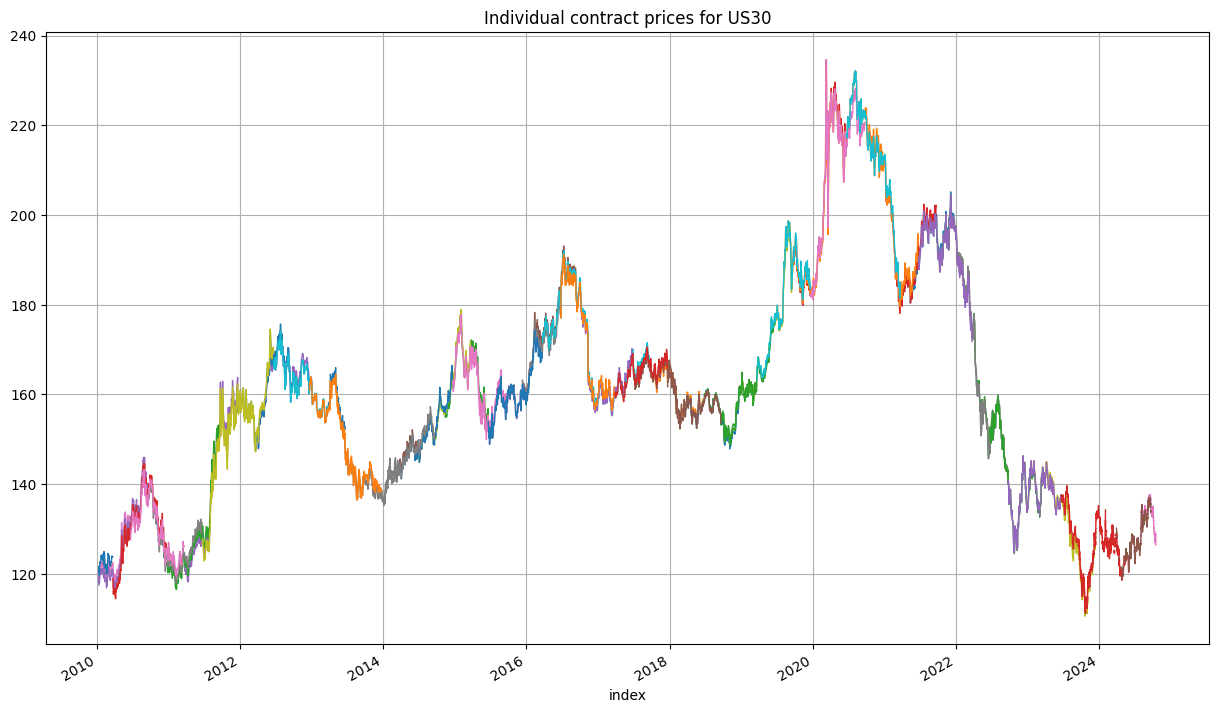

In [21]:
prices = diag_prices.db_futures_contract_price_data

price_dict = prices.get_merged_prices_for_instrument(INSTR)
contract_data = dict([(contractid, data) for contractid, data in price_dict.items()])
all_contract_data = dictFuturesContractPrices([(key, futuresContractPrices(x)) for key, x in contract_data.items()])
contract_prices_final = all_contract_data.final_prices()
all_finals = pd.concat(contract_prices_final, axis=1)
#all_finals = all_finals["2023-09-01":"2024-02-01"] # slice by date
#all_finals = all_finals[["20220900","20220900"]] # slice by contract
all_finals.plot(figsize=(15,9), legend=False, lw=1, grid=True, title=f"Individual contract prices for {INSTR}")

## view expected roll calendar

In [22]:
rollparameters = csvRollParametersData()
roll_parameters_object = rollparameters.get_roll_parameters(INSTR)

prices_dict = prices.get_merged_prices_for_instrument(INSTR)
prices_dict = prices_dict.final_prices()
approx_roll_calendar = rollCalendar.create_approx_from_prices(
    prices_dict, roll_parameters_object
)

print(f"Approx roll calendar for: {INSTR}")
print_full(approx_roll_calendar)

2010-02-23 00:00:00,20100300,20100600,20100600
2010-05-26 00:00:00,20100600,20100900,20100900
2010-08-26 00:00:00,20100900,20101200,20101200
2010-11-25 00:00:00,20101200,20110300,20110300
2011-02-23 00:00:00,20110300,20110600,20110600
2011-05-26 00:00:00,20110600,20110900,20110900
2011-08-26 00:00:00,20110900,20111200,20111200
2011-11-25 00:00:00,20111200,20120300,20120300
2012-02-24 00:00:00,20120300,20120600,20120600
2012-05-26 00:00:00,20120600,20120900,20120900
2012-08-26 00:00:00,20120900,20121200,20121200
2012-11-25 00:00:00,20121200,20130300,20130300
2013-02-23 00:00:00,20130300,20130600,20130600
2013-05-26 00:00:00,20130600,20130900,20130900
2013-08-26 00:00:00,20130900,20131200,20131200
2013-11-25 00:00:00,20131200,20140300,20140300
2014-02-23 00:00:00,20140300,20140600,20140600
2014-05-26 00:00:00,20140600,20140900,20140900
2014-08-26 00:00:00,20140900,20141200,20141200
2014-11-25 00:00:00,20141200,20150300,20150300
2015-02-23 00:00:00,20150300,20150600,20150600
2015-05-26 00

## build roll calendar

In [23]:
roll_calendar_output = "/home/alpha/data/futures/roll_calendars_csv"
#roll_calendar_output = "/home/alpha/pysystemtrade/data/futures/roll_calendars_csv"
#roll_calendar_output = "/Users/ageach/Dev/work/pst_jk/data/futures/roll_calendars_csv"

roll_cal = build_and_write_roll_calendar(
    INSTR,
    output_datapath=roll_calendar_output,
    check_before_writing=False
)

Writing to /home/alpha/data/futures/roll_calendars_csv
Prepping roll calendar... might take a few seconds
2010-02-23 00:00:00,20100300,20100600,20100600
2010-05-26 00:00:00,20100600,20100900,20100900
2010-08-26 00:00:00,20100900,20101200,20101200
2010-11-25 00:00:00,20101200,20110300,20110300
2011-02-23 00:00:00,20110300,20110600,20110600
2011-05-26 00:00:00,20110600,20110900,20110900
2011-08-26 00:00:00,20110900,20111200,20111200
2011-11-25 00:00:00,20111200,20120300,20120300
2012-02-24 00:00:00,20120300,20120600,20120600
2012-05-26 00:00:00,20120600,20120900,20120900
2012-08-26 00:00:00,20120900,20121200,20121200
2012-11-25 00:00:00,20121200,20130300,20130300
2013-02-23 00:00:00,20130300,20130600,20130600
2013-05-26 00:00:00,20130600,20130900,20130900
2013-08-26 00:00:00,20130900,20131200,20131200
2013-11-25 00:00:00,20131200,20140300,20140300
2014-02-23 00:00:00,20140300,20140600,20140600
2014-05-26 00:00:00,20140600,20140900,20140900
2014-08-26 00:00:00,20140900,20141200,20141200
2

In [ ]:
## view the prices for two contract side by side
- this can help resolve issues like "Couldn't find matching roll date for contracts...."
- enter the two offending contract keys, `earlier_contract_key` and `later_contract_key`, then run the cell

In [ ]:
earlier_contract_key = "20220900"
later_contract_key = "20221200"

db_prices_dict = prices.get_merged_prices_for_instrument(INSTR)
earlier = db_prices_dict[earlier_contract_key].return_final_prices()
later = db_prices_dict[later_contract_key].return_final_prices()

combined = pd.concat([earlier, later], axis=1)
combined.columns = [earlier_contract_key, later_contract_key]

print_full(combined)

## Check resulting roll calendar, editing if necessary
- look at the actual roll calendar CSV file
- first check the pattern of contract keys per roll date
  - you can compare against the one provided: the contract keys for a particular date in the past should be the same
  - for example, the second last row in Rob's was for 2022-03-10
    - the pattern was 20220300,20220600,20220600. The new one should be the same
- next check the last row. The date on the last row sometimes gets adjusted to the last available price row
  - if that happens, edit to be what the date sequence says it should be
    - for example: the last row for SP500_micro has date of 2024-09-06. That's because the prices were downloaded around 7 September 2024
    - edit the last row to be 2024-09-11 (just look at the previous year's September row)
- finally, if there isn't a row at the end for the next future roll date, add one
  - so for SP500_micro, there should be a future row for around 10 December 2024. But there isn't, so add it
  - copy the row for December 2023, and add it to the end. Then increment each of the years
    - so '2023-12-11,20231200,20240300,20240300' becomes '2024-12-11,20241200,20250300,20250300'


## Create multiple prices

In [24]:
print(INSTR)
process_multiple_prices_single_instrument(INSTR, ADD_TO_CSV=False)

US30
Getting prices to adjust roll calendar
Changed date from 2010-02-23 23:00:00 to 2010-02-23 23:00:00 for '2010-02-23 23:00:00,20100300,20100600,20100600'
Changed date from 2010-05-26 23:00:00 to 2010-05-26 23:00:00 for '2010-05-26 23:00:00,20100600,20100900,20100900'
Changed date from 2010-08-26 23:00:00 to 2010-08-26 23:00:00 for '2010-08-26 23:00:00,20100900,20101200,20101200'
Changed date from 2010-11-24 23:00:00 to 2010-11-24 23:00:00 for '2010-11-24 23:00:00,20101200,20110300,20110300'
Changed date from 2011-02-23 23:00:00 to 2011-02-23 23:00:00 for '2011-02-23 23:00:00,20110300,20110600,20110600'
Changed date from 2011-05-26 23:00:00 to 2011-05-26 23:00:00 for '2011-05-26 23:00:00,20110600,20110900,20110900'
Changed date from 2011-08-26 23:00:00 to 2011-08-26 23:00:00 for '2011-08-26 23:00:00,20110900,20111200,20111200'
Changed date from 2011-11-25 23:00:00 to 2011-11-25 23:00:00 for '2011-11-25 23:00:00,20111200,20120300,20120300'
Changed date from 2012-02-24 23:00:00 to 201

,PRICE,FORWARD,CARRY,PRICE_CONTRACT,FORWARD_CONTRACT,CARRY_CONTRACT
index,,,,,,
2010-02-24 23:00:00,120.96875,119.46875,119.46875,20100600,20100900,20100900
2010-02-25 23:00:00,121.96875,120.43750,120.43750,20100600,20100900,20100900
2010-02-26 23:00:00,123.06250,121.53125,121.53125,20100600,20100900,20100900
2010-03-01 23:00:00,122.53125,121.00000,121.00000,20100600,20100900,20100900
2010-03-02 23:00:00,122.28125,120.75000,120.75000,20100600,20100900,20100900
...,...,...,...,...,...,...
2024-10-15 16:30:00,128.43750,NaN,NaN,20241200,20250300,20250300
2024-10-15 17:00:00,128.56250,NaN,NaN,20241200,20250300,20250300
2024-10-15 18:00:00,128.93750,NaN,NaN,20241200,20250300,20250300


## Check multiple prices
- check start end dates, no gaps etc

US30


<Axes: xlabel='index'>

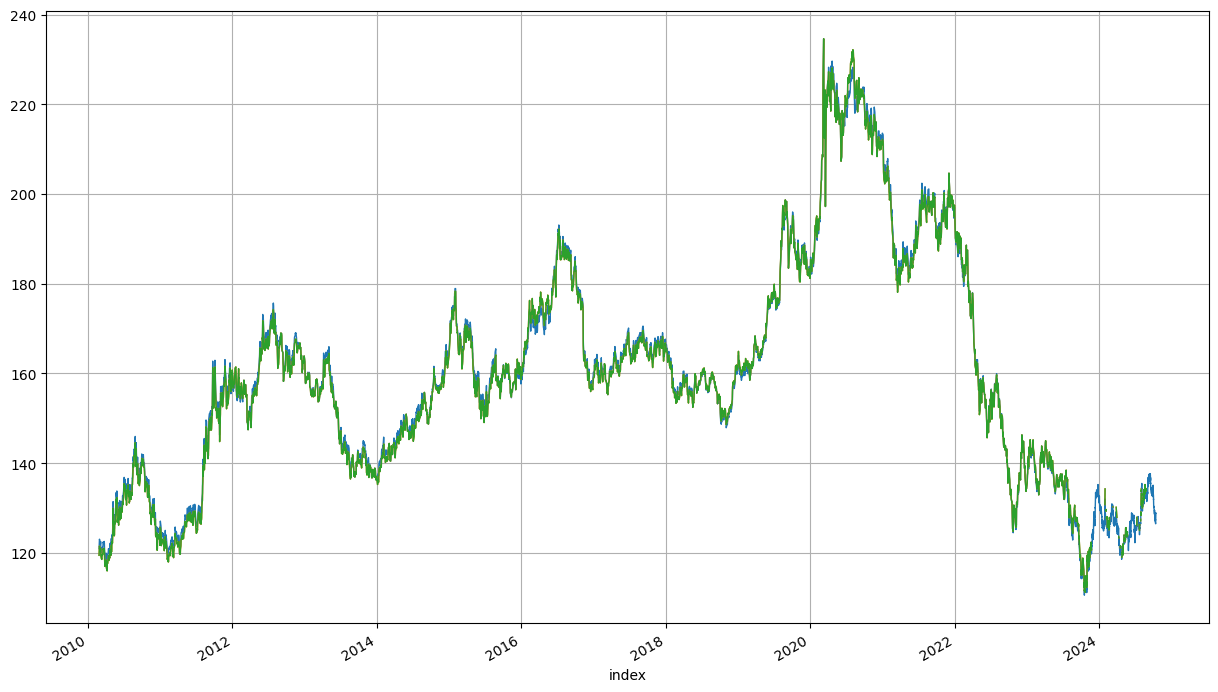

In [25]:
print(INSTR)
db_multiple_prices = diag_prices.db_futures_multiple_prices_data
#db_multiple_prices = multiple_prices["2023-07-01":"2023-12-31"] # slice by date
db_multiple_prices.get_multiple_prices(INSTR).plot(figsize=(15,9), legend=False, lw=1, grid=True)

## generate adjusted prices

In [26]:
process_adjusted_prices_single_instrument(INSTR, ADD_TO_CSV=False)

index
2010-02-24 23:00:00     99.21875
2010-02-25 23:00:00    100.21875
2010-02-26 23:00:00    101.31250
2010-03-01 23:00:00    100.78125
2010-03-02 23:00:00    100.53125
                         ...    
2024-10-15 16:30:00    128.43750
2024-10-15 17:00:00    128.56250
2024-10-15 18:00:00    128.93750
2024-10-15 19:00:00    128.78125
2024-10-15 20:00:00    128.90625
Length: 5446, dtype: float64
2024-10-15 21:18:12 DEBUG root {'component': 'parquetFuturesAdjustedPricesData', 'instrument_code': 'US30'} Wrote 5446 lines of prices for US30 to parquetFuturesAdjustedPrices
2024-10-15 21:18:12 INFO root {'component': 'parquetFuturesAdjustedPricesData', 'instrument_code': 'US30'} Added data for instrument US30


index
2010-02-24 23:00:00     99.21875
2010-02-25 23:00:00    100.21875
2010-02-26 23:00:00    101.31250
2010-03-01 23:00:00    100.78125
2010-03-02 23:00:00    100.53125
                         ...    
2024-10-15 16:30:00    128.43750
2024-10-15 17:00:00    128.56250
2024-10-15 18:00:00    128.93750
2024-10-15 19:00:00    128.78125
2024-10-15 20:00:00    128.90625
Length: 5446, dtype: float64

## check adjusted prices

US30


<Axes: xlabel='index'>

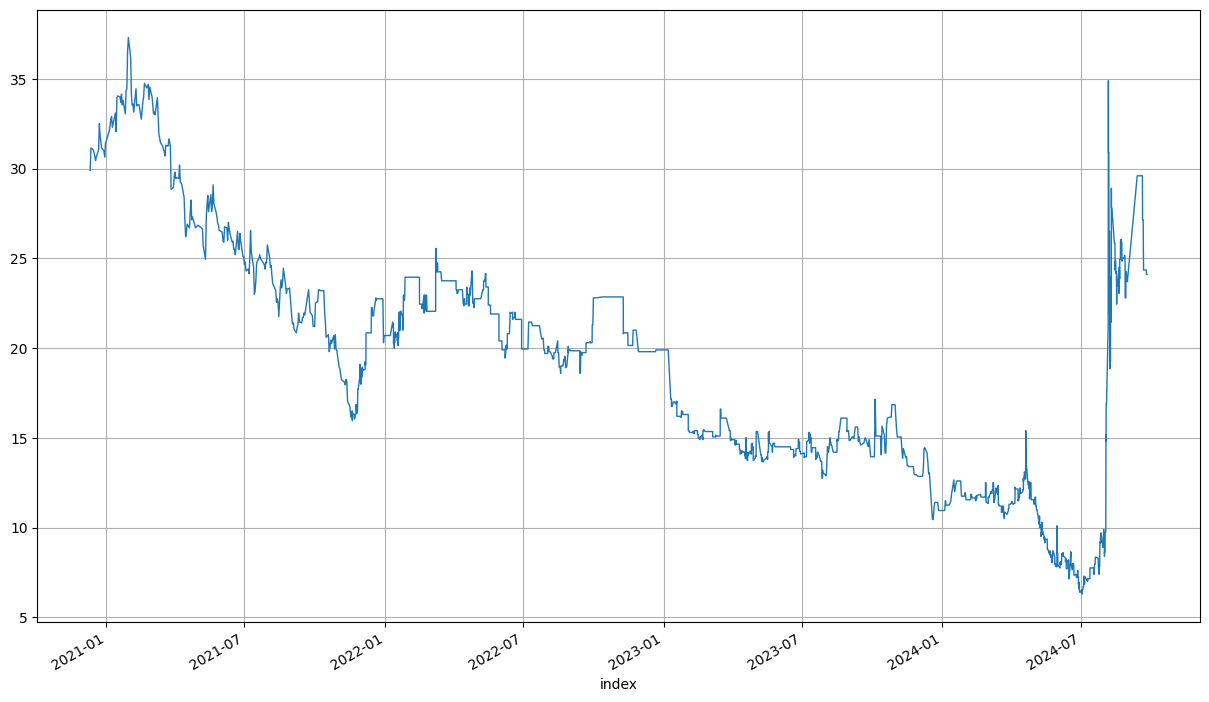

In [31]:
print(INSTR)
db_adjusted_prices = diag_prices.db_futures_adjusted_prices_data
#db_adjusted_prices.get_adjusted_prices(INSTR).plot(figsize=(15,9), legend=False, lw=1, grid=True)
db_adjusted_prices.get_adjusted_prices("VNKI").plot(figsize=(15,9), legend=False, lw=1, grid=True)

## Update sampled contracts

In [ ]:
# update_sampled_contracts()
$ python pysystemtrade/sysproduction/update_sampled_contracts.py

In [27]:
process_adjusted_prices_single_instrument(INSTR, ADD_TO_CSV=True)

index
2010-02-24 23:00:00     99.21875
2010-02-25 23:00:00    100.21875
2010-02-26 23:00:00    101.31250
2010-03-01 23:00:00    100.78125
2010-03-02 23:00:00    100.53125
                         ...    
2024-10-15 16:30:00    128.43750
2024-10-15 17:00:00    128.56250
2024-10-15 18:00:00    128.93750
2024-10-15 19:00:00    128.78125
2024-10-15 20:00:00    128.90625
Length: 5446, dtype: float64
2024-10-15 21:19:12 DEBUG root {'component': 'parquetFuturesAdjustedPricesData', 'instrument_code': 'US30'} Wrote 5446 lines of prices for US30 to parquetFuturesAdjustedPrices
2024-10-15 21:19:12 INFO root {'component': 'parquetFuturesAdjustedPricesData', 'instrument_code': 'US30'} Added data for instrument US30
2024-10-15 21:19:12 INFO csvFuturesContractPriceData {'instrument_code': 'US30'} Added data for instrument US30


index
2010-02-24 23:00:00     99.21875
2010-02-25 23:00:00    100.21875
2010-02-26 23:00:00    101.31250
2010-03-01 23:00:00    100.78125
2010-03-02 23:00:00    100.53125
                         ...    
2024-10-15 16:30:00    128.43750
2024-10-15 17:00:00    128.56250
2024-10-15 18:00:00    128.93750
2024-10-15 19:00:00    128.78125
2024-10-15 20:00:00    128.90625
Length: 5446, dtype: float64